In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("insurance (1).csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='age', ylabel='Count'>

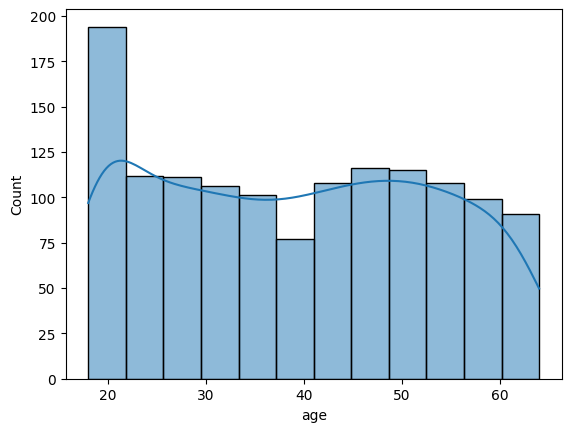

In [4]:
sns.histplot(df['age'], kde=True)

<Axes: ylabel='age'>

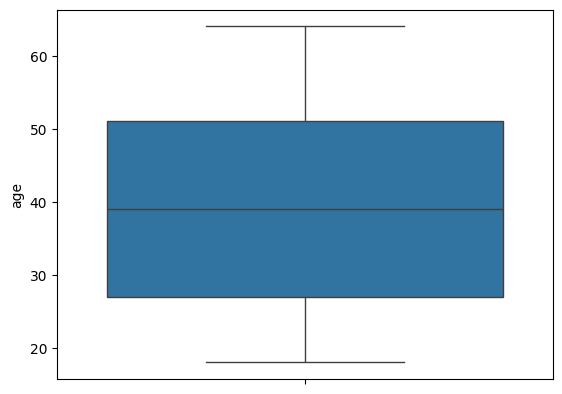

In [5]:
sns.boxplot(df['age'])

<Axes: xlabel='bmi', ylabel='Count'>

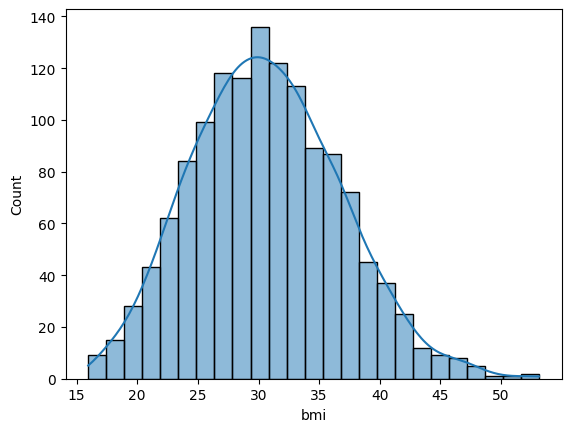

In [6]:
sns.histplot(df['bmi'], kde=True)

<Axes: ylabel='bmi'>

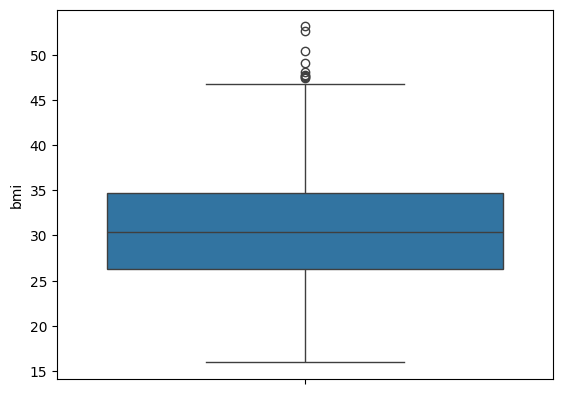

In [7]:
sns.boxplot(df['bmi'])

<Axes: xlabel='charges', ylabel='Count'>

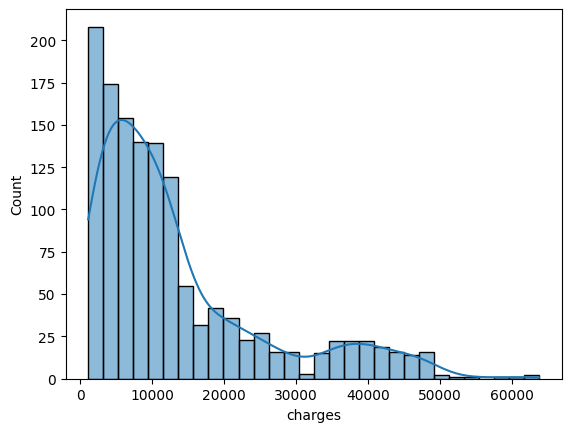

In [8]:
sns.histplot(df['charges'], kde=True)

<Axes: ylabel='charges'>

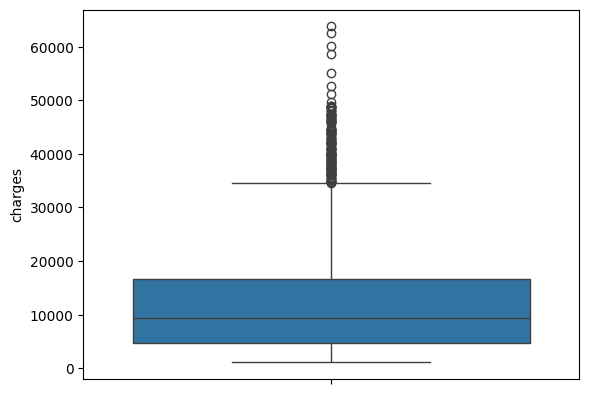

In [9]:
sns.boxplot(df['charges'])

<Axes: >

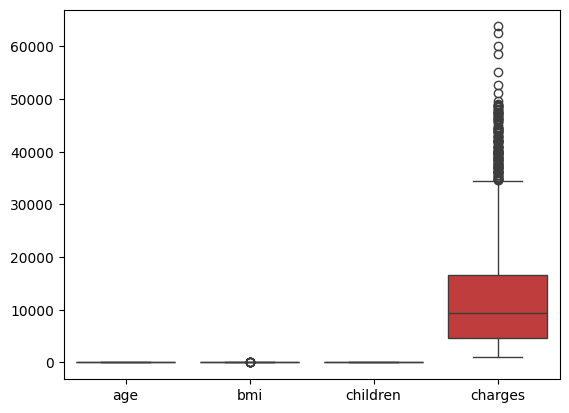

In [10]:
sns.boxplot(df)

<Axes: ylabel='children'>

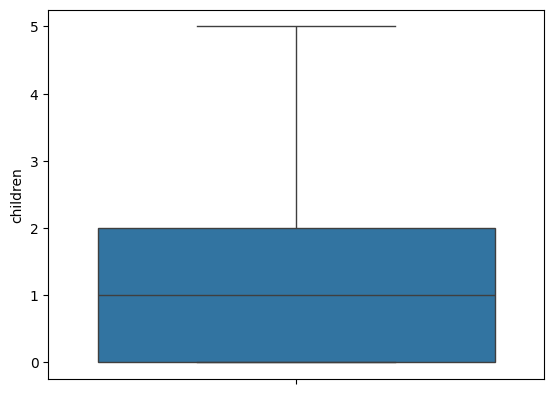

In [11]:
sns.boxplot(df['children'])

In [12]:
#z score for bmi
mean_val_bmi = df['bmi'].mean()
mean_val_bmi

np.float64(30.66339686098655)

In [13]:
std_val_bmi = df['bmi'].std()
std_val_bmi

np.float64(6.098186911679014)

In [14]:
df['pred_Z_bmi'] = (df['bmi'] - mean_val_bmi) / std_val_bmi

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges,pred_Z_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,-0.453151
1,18,male,33.770,1,no,southeast,1725.55230,0.509431
2,28,male,33.000,3,no,southeast,4449.46200,0.383164
3,33,male,22.705,0,no,northwest,21984.47061,-1.305043
4,32,male,28.880,0,no,northwest,3866.85520,-0.292447


In [16]:
df[df['pred_Z_bmi'] > 3]

,age,sex,bmi,children,smoker,region,charges,pred_Z_bmi
116,58,male,49.06,0,no,southeast,11381.3254,3.016733
847,23,male,50.38,1,no,southeast,2438.0552,3.233191
1047,22,male,52.58,1,yes,southeast,44501.3982,3.593954
1317,18,male,53.13,0,no,southeast,1163.4627,3.684145


In [19]:
df[df['pred_Z_bmi']<-3]

,age,sex,bmi,children,smoker,region,charges,pred_Z_bmi


In [20]:
df1 = df[(df['pred_Z_bmi'] <= 3) & (df['pred_Z_bmi'] >= -3)]

In [21]:
print(df.shape, df1.shape)

(1338, 8) (1334, 8)


<Axes: ylabel='bmi'>

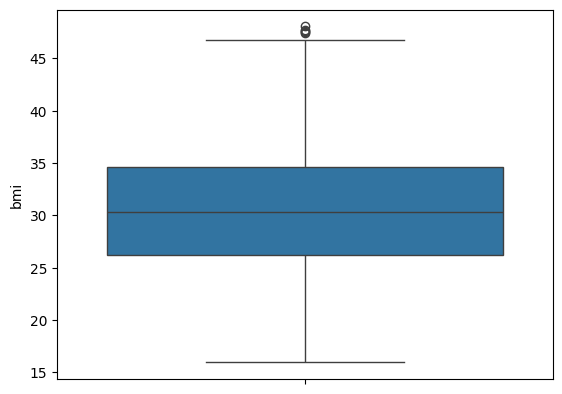

In [22]:
sns.boxplot(df1['bmi'])

<Axes: ylabel='pred_Z_bmi'>

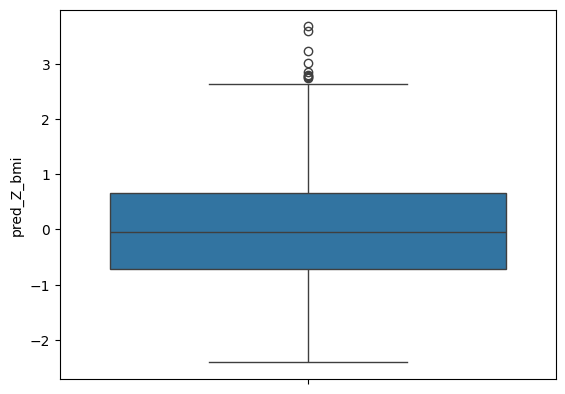

In [23]:
sns.boxplot(df['pred_Z_bmi'])

<Axes: ylabel='bmi'>

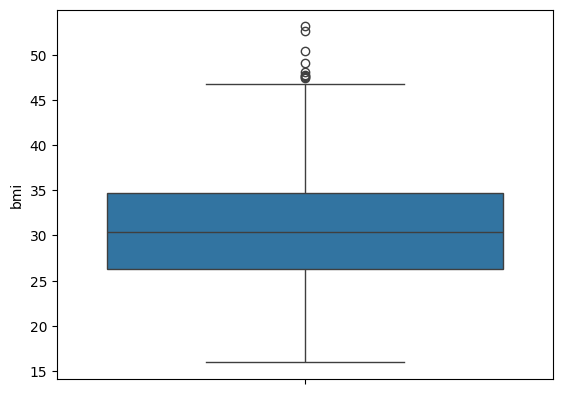

In [25]:
sns.boxplot(df['bmi'])

In [26]:
#std find out
df.head(2)

,age,sex,bmi,children,smoker,region,charges,pred_Z_bmi
0,19,female,27.90,0,yes,southwest,16884.9240,-0.453151
1,18,male,33.77,1,no,southeast,1725.5523,0.509431


In [27]:
df = df.drop(['pred_Z_bmi'], axis=1)

In [28]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [29]:
me_val_bmi = df['bmi'].mean()
st_val_bmi = df['bmi'].std()

In [30]:
pos = me_val_bmi + 3 * st_val_bmi
neg = me_val_bmi - 3 * st_val_bmi

In [31]:
print(pos, neg)

48.95795759602359 12.368836125949507


In [32]:
df[df['bmi'] > pos]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [33]:
df[df['bmi'] < neg]

,age,sex,bmi,children,smoker,region,charges


In [34]:
df[(df['bmi'] > pos) | (df['bmi'] < neg)]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [35]:
df2 = df[(df['bmi'] <= pos) & (df['bmi'] >= neg)]

<Axes: ylabel='bmi'>

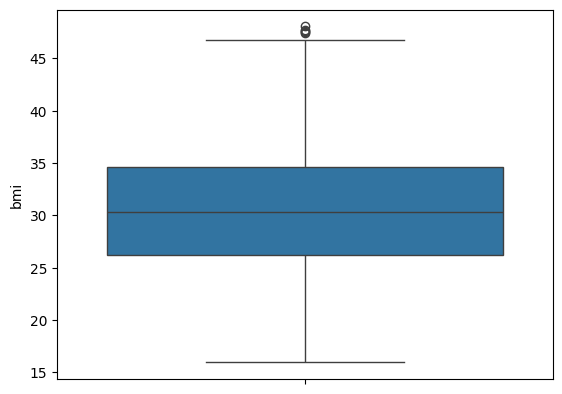

In [36]:
sns.boxplot(df2['bmi'])

In [42]:
#boxplot
q1 = df['bmi'].quantile(.25)
q3 = df['bmi'].quantile(.75)

In [43]:
print(q1, q3)

26.29625 34.69375


In [44]:
iqr = q3 - q1
iqr

np.float64(8.3975)

In [45]:
low_whisker = q1 - 1.5 * iqr
low_whisker

np.float64(13.7)

In [46]:
up_whisker = q3 + 1.5 * iqr
up_whisker

np.float64(47.290000000000006)

In [47]:
def outlier(df, col):
    q1 = df['bmi'].quantile(.25)
    q3 = df['bmi'].quantile(.75)

    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    return df[(df[col] >= lower_whisker) & (df[col] <= upper_whisker)]

In [48]:
df3 = outlier(df, "bmi")

In [51]:
print(df.shape, df3.shape)

(1338, 7) (1329, 7)


<Axes: ylabel='bmi'>

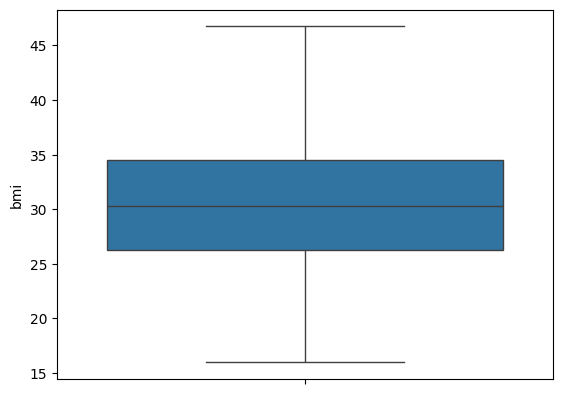

In [52]:
sns.boxplot(df3['bmi'])